In [1]:
## Important Options:
run_epochs = 300 
run_model_type = "semi_y_CCVAE"

run_save_folder = "../../outputs/experiments_test/freyfaces/ccvae/" 
run_read_data_folder = "../../data/examples_frey_faces/corrupt_level_35_percent/run_1/" # 1 2 3
trust_set_name = "10_samples_per_class" # 5; 10; 25, 50;



In [2]:
ls ../../outputs

experiments_test/


In [3]:
%run ../repair_syserr_models/main.py \
    --cuda-on \
    --save-on \
    --output-folder {run_save_folder} \
    --verbose-metrics-epoch \
    --model-type {run_model_type} \
    --number-epochs {run_epochs} \
    --dataset-folder {run_read_data_folder} \
    --semi-supervise \
    --y-clean-prior 0.6 \
    --lr 1e-3 \
    --q-y-x-coeff 10000.0 \
    --trust-set-name {trust_set_name}


Namespace(activation='relu', batch_size=128, cuda_on=True, data_folder='../../data/examples_frey_faces/corrupt_level_35_percent/run_1/', dist_corr_reg=False, dist_corr_reg_coeff=1.0, embedding_size=50, fixed_prior_z_clean=1.0, fixed_prior_z_dirty=5.0, fixed_prior_zy0_sigma=5.0, fixed_prior_zy1_sigma=1.0, kl_anneal=False, kl_anneal_cycles=1, kl_anneal_delay_epochs=5, kl_anneal_ratio=0.5, kl_anneal_start=1e-06, kl_anneal_stop=1.0, kl_beta_const=1.0, l2_reg=0.0, latent_dim=15, layer_size=400, learn_z_given_y_priors=False, load_model=False, load_model_path=None, log_interval=50, lr=0.001, mean_eps_z_in=0.0, model_type='semi_y_CCVAE', number_epochs=300, output_folder='../../outputs/experiments_test/freyfaces/ccvae/', q_y_x_coeff=10000.0, qy_sup_weights=None, reg_delay_n_epochs=5, reg_schedule_ratio=0.5, save_on=True, semi_supervise=True, sigma_eps_z_in=0.1, size_input=560, size_output=560, sup_loss_coeff=0.1, train_on_clean_data=False, trust_set_name='10_samples_per_class', use_batch_norm=F

### Define Paths

In [4]:
# Data folder
file_path_data = run_read_data_folder + "train/"

# Experiment / results folder
model_type = run_model_type
file_path_exper = run_save_folder + model_type + "/"

In [5]:
# Check folder of dataset
!ls {file_path_data}/..

cols_info.json	full  noising_info.json  test  train  validation


In [6]:
with open(file_path_data + "y_noise_dict.json") as json_file:
    y_noise_dict_train = json.load(json_file)
    
#trusted_idxs_train = pd.read_csv(file_path_data + "trusted_idxs.csv").values.flatten()
trusted_idxs_train = pd.read_csv(file_path_data + f"/trusted_idxs_{trust_set_name}.csv").values.flatten()

In [7]:
ls "../../data/examples_frey_faces/corrupt_level_35_percent/run_1/train/"

cells_changed_mtx.csv                  trusted_idxs_25_samples_per_class.csv
changes_summary.csv                    trusted_idxs_50_samples_per_class.csv
data_clean.csv                         trusted_idxs_5_samples_per_class.csv
data_noised.csv                        tuples_changed_mtx.csv
original_idxs.csv                      y_noise_dict.json
trusted_idxs_10_samples_per_class.csv


### Check VARS on Notebook

In [8]:
whos

Variable               Type             Data/Info
-------------------------------------------------
StandardTrainer        type             <class 'repair_syserr_mod<...>r_utils.StandardTrainer'>
args                   Namespace        Namespace(activation='rel<...>False, y_clean_prior=0.6)
compute_metrics        function         <function compute_metrics at 0x7fe78444a4c0>
dict_main_vars         dict             n=51
errno                  module           <module 'errno' (built-in)>
evaluation_phase       function         <function evaluation_phase at 0x7fe63abbf5e0>
file_path_data         str              ../../data/examples_frey_<...>l_35_percent/run_1/train/
file_path_exper        str              ../../outputs/experiments<...>faces/ccvae/semi_y_CCVAE/
frange_cycle_linear    function         <function frange_cycle_linear at 0x7fe63d335b80>
gen_utils              module           <module 'repair_syserr_mo<...>err_models/gen_utils.py'>
json                   module           <module

In [9]:
# debug vars -- from main.py
dict_main_vars.keys()

dict_keys(['args', 'train_loader', 'X_train', 'target_errors_train', 'dataset_obj', 'attributes', 'trusted_mask', 'train_loader_no_shuff', 'valid_loader', 'X_valid', 'target_errors_valid', 'dataset_valid_obj', '_', 'valid_loader_no_shuff', 'test_loader', 'X_test', 'target_errors_test', 'dataset_test_obj', 'test_loader_no_shuff', 'train_clean_loader', 'X_train_clean', 'dataset_obj_train_clean', 'train_clean_loader_no_shuff', 'X_valid_clean', 'dataset_obj_valid_clean', 'valid_clean_loader_no_shuff', 'X_test_clean', 'dataset_obj_test_clean', 'test_clean_loader_no_shuff', 'runin_model', 'model', 'train_optim', 'losses_save', 'kl_anneal', 'kl_beta_n_cycles', 'kl_beta_ratio', 'delay_n_epochs', 'kl_beta_vec', 'reg_schedule_vec', '_train_loader_used', '_train_loader_no_shuff', '_valid_loader_no_shuff', '_test_loader_no_shuff', '_X_train', '_X_valid', '_X_test', 'epoch', 'kl_beta_val', 'reg_schedule_val', 'folder_output', 'outfile'])

### Load Packages 

In [10]:
import pandas as pd
import numpy as np
import torch
import repair_syserr_models.gen_utils as gen_utils
from repair_syserr_models import semi_y_CCVAE
import json

import pprint
import seaborn as sns
from matplotlib import pyplot as plt
import os
import json

### Check Dataset Definitions and Noising

In [11]:
with open(file_path_data + "../noising_info.json") as f:
    dt_defs = json.load(f)
pprint.pprint(dt_defs)


{'defs': {'combs_on': False,
          'max_val': 256,
          'min_val': 0,
          'number_blocks': 4,
          'p_img': 0.35,
          'p_min': 0.5,
          'pixel_val_fixed': None,
          'rand_blocks': True,
          'random_state': None,
          'side_len': 6,
          'std_shift': [10, 10],
          'use_other_patterns': False},
 'name': 'run_1',
 'noise_list_trusted': 'regular',
 'test_size': 0.1,
 'train_size': 0.8,
 'trusted_set': {'dataset_size': 1965,
                 'frac_trusted': None,
                 'mc_mode': 'fixed_number',
                 'min_coverage': True,
                 'n_classes': 5,
                 'percentages': [1.2722646310432568,
                                 2.5445292620865136,
                                 6.361323155216285,
                                 12.72264631043257],
                 'samples_fixed': [5, 10, 25, 50],
                 'total_points': [25, 50, 125, 250],
                 'use_labels': 'joint_classes'

In [12]:
with open(file_path_data + "../cols_info.json") as f:
    col_defs = json.load(f)
pprint.pprint(col_defs)

{'cat_cols_names': [],
 'dataset_type': 'image',
 'image_defs': {'channel_type': 'gray',
                'channels': [],
                'num_channels': 1,
                'size': [28, 20]},
 'num_cols_names': ['pixel_0',
                    'pixel_1',
                    'pixel_2',
                    'pixel_3',
                    'pixel_4',
                    'pixel_5',
                    'pixel_6',
                    'pixel_7',
                    'pixel_8',
                    'pixel_9',
                    'pixel_10',
                    'pixel_11',
                    'pixel_12',
                    'pixel_13',
                    'pixel_14',
                    'pixel_15',
                    'pixel_16',
                    'pixel_17',
                    'pixel_18',
                    'pixel_19',
                    'pixel_20',
                    'pixel_21',
                    'pixel_22',
                    'pixel_23',
                    'pixel_24',
                   

### Load Datasets

In [13]:


# train
train_loader, X_train, target_errors_train, dataset_obj, attributes, trusted_mask = gen_utils.load_data(args.data_folder, 
                                                                                                        args.batch_size,
                                                                                                        is_train=True,
                                                                                                        get_data_idxs=True,
                                                                                                        semi_sup_data=True,
                                                                                                        use_binary_img=False,
                                                                                                        trust_set_name=trust_set_name)
    

# Dynamic options for dataset_obj (from args)
dataset_obj.use_binary_img = args.use_binary_img


# test
test_loader, X_test, target_errors_test, _, _ = gen_utils.load_data(args.data_folder, 
                                                                    args.batch_size, 
                                                                    is_train=False,
                                                                    use_binary_img=False)

# -> clean versions for evaluation
_, X_train_clean, _, _, _ = gen_utils.load_data(args.data_folder, 
                                                args.batch_size,
                                                is_train=True, 
                                                is_clean=True, 
                                                stdize_dirty=True,
                                                use_binary_img=False)

_, X_test_clean, _, _, _ = gen_utils.load_data(args.data_folder, 
                                               args.batch_size, 
                                               is_train=False,
                                               is_clean=True, 
                                               stdize_dirty=True,
                                               use_binary_img=False)


In [14]:
args.data_folder

'../../data/examples_frey_faces/corrupt_level_35_percent/run_1/'

In [15]:
y_noise_instance_train = target_errors_train.any(dim=1).numpy()
y_noise_pixels_train = target_errors_train.numpy().reshape(-1,28,20)

x_train_orig = X_train.view(-1,28,20).numpy()*dataset_obj.cont_stds + dataset_obj.cont_means
x_train_clean_orig = X_train_clean.view(-1,28,20).numpy()*dataset_obj.cont_stds + dataset_obj.cont_means


In [16]:
dataset_obj.cont_means

154.0488358778626

In [17]:
dataset_obj.cont_stds

48.54248012196572

In [18]:
X_train_clean.view(-1,28,20)

tensor([[[-3.3061e-01,  3.2860e-01,  4.9341e-01,  ..., -9.8983e-01,
          -1.0310e+00,  8.1396e-02],
         [-8.6623e-01,  1.6380e-01,  3.2860e-01,  ..., -6.6022e-01,
          -1.1546e+00, -2.1607e-02],
         [-9.0743e-01,  1.2260e-01,  2.8740e-01,  ..., -3.3061e-01,
          -1.2370e+00, -1.2461e-01],
         ...,
         [ 8.1396e-02, -2.0701e-01, -4.9542e-01,  ...,  9.6722e-01,
           8.6422e-01,  6.9941e-01],
         [ 6.0795e-02, -1.0401e-01, -5.3662e-01,  ...,  9.0542e-01,
           8.6422e-01,  6.9941e-01],
         [ 1.9594e-02, -1.0401e-01, -5.1602e-01,  ...,  9.4662e-01,
           8.4361e-01,  6.5821e-01]],

        [[ 2.6680e-01,  6.7881e-01,  7.6121e-01,  ..., -8.0443e-01,
          -1.6284e+00, -3.9242e-01],
         [ 1.4320e-01,  5.5521e-01,  5.9641e-01,  ..., -1.2461e-01,
          -1.8551e+00, -4.1302e-01],
         [ 1.4320e-01,  4.3160e-01,  5.3461e-01,  ...,  3.2860e-01,
          -1.8963e+00, -5.3662e-01],
         ...,
         [-2.8941e-01, -1

### Load Model

In [19]:
vae_mdl = eval(model_type).VAE(dataset_obj, args)
file_path_model = file_path_exper + "model_params.pth"
vae_mdl.load_state_dict(torch.load(file_path_model))
vae_mdl.eval()

VAE(
  (activ): ReLU()
  (encoder): encMod(
    (encoder): baseEncoder(
      (activ): ReLU()
      (feat_embedd): ModuleList()
      (mod_fw_seq): Sequential(
        (fc_0): Linear(in_features=560, out_features=200, bias=True)
        (activ_0): ReLU()
        (fc_1): Linear(in_features=200, out_features=100, bias=True)
        (activ_1): ReLU()
        (fc_2): Linear(in_features=100, out_features=50, bias=True)
        (activ_2): ReLU()
      )
    )
    (locs): Linear(in_features=50, out_features=16, bias=True)
    (scales): Linear(in_features=50, out_features=16, bias=True)
  )
  (decoder): baseDecoder(
    (activ): ReLU()
    (mod_fw_seq): Sequential(
      (fc_0): Linear(in_features=16, out_features=50, bias=True)
      (activ_0): ReLU()
      (fc_1): Linear(in_features=50, out_features=100, bias=True)
      (activ_1): ReLU()
      (fc_2): Linear(in_features=100, out_features=200, bias=True)
      (activ_2): ReLU()
    )
    (out_cat_linears): Linear(in_features=200, out_feature

### Load Results from Folder

In [20]:
df_train_metrics = pd.read_csv(file_path_exper + "train_epochs_data.csv")
df_valid_metrics = pd.read_csv(file_path_exper + "validation_epochs_data.csv")
df_test_metrics = pd.read_csv(file_path_exper + "test_epochs_data.csv")

In [21]:
!ls {file_path_exper}

args_run.json			train_error_repair_features.csv
model_params.pth		trusted_auc_features.csv
test_auc_features.csv		trusted_avpr_features.csv
test_avpr_features.csv		trusted_epochs_data.csv
test_epochs_data.csv		trusted_error_repair_features.csv
test_error_repair_features.csv	validation_auc_features.csv
train_auc_features.csv		validation_avpr_features.csv
train_avpr_features.csv		validation_epochs_data.csv
train_epochs_data.csv		validation_error_repair_features.csv


In [22]:
df_train_metrics

Epochs  Avg. TOTAL_LOSS  Avg. LOSS_ELBO  Avg. LOSS_SUP    Avg. NLL  \
0         1       312.555502      312.555502            0.0  158.255126   
1         2       247.307749      247.307749            0.0  127.378280   
2         3       214.332382      214.332382            0.0  120.387055   
3         4       185.154926      185.154926            0.0  116.427791   
4         5       159.349186      159.349186            0.0  112.187094   
..      ...              ...             ...            ...         ...   
295     296      -599.521133     -599.521133            0.0 -627.851664   
296     297      -604.995481     -604.995481            0.0 -632.307239   
297     298      -605.273328     -605.273328            0.0 -633.377674   
298     299      -599.118529     -599.118529            0.0 -627.191698   
299     300      -605.544509     -605.544509            0.0 -633.283937   

     Avg. KLD_TOT  Avg. KLD_Z  AUC Cell nll score  AVPR Cell nll score  \
0       11.187242   11.187242            0.994354             0.924225   
1        3.334276    3.334276            0.997448             0.949723   
2        3.734533    3.734533            0.997634             0.952072   
3        2.568401    2.568401            0.997379             0.948656   
4        3.743544    3.743544            0.997172             0.941677   
..            ...         ...                 ...                  ...   
295     27.654138   27.654138            0.993561             0.947146   
296     26.673308   26.673308            0.994188             0.951483   
297     27.455066   27.455066            0.993618             0.947830   
298     27.420106   27.420106            0.994359             0.952363   
299     27.067627   27.067627            0.993463             0.947620   

     AUC Row nll score  AVPR Row nll score  AUC Row class_y score  \
0             0.946541            0.893841               0.881458   
1             0.919275            0.848389               0.952465   
2             0.924253            0.857100               0.981744   
3             0.954468            0.909086               0.995625   
4             0.957035            0.915675               0.999006   
..                 ...                 ...                    ...   
295           0.995003            0.987688               0.998290   
296           0.995760            0.989380               0.998250   
297           0.995584            0.989115               0.998349   
298           0.995430            0.988665               0.998102   
299           0.995084            0.987976               0.998618   

     AVPR Row class_y score  Error lower-bound on dirty pos  \
0                  0.866220                        0.843585   
1                  0.944109                        0.695766   
2                  0.979305                        0.706709   
3                  0.994021                        0.690322   
4                  0.998384                        0.637900   
..                      ...                             ...   
295                0.996754                        0.178907   
296                0.996675                        0.174754   
297                0.996861                        0.175178   
298                0.996404                        0.179882   
299                0.997338                        0.175820   

     Error upper-bound on dirty pos  Error repair on dirty pos  \
0                         21.566447                   0.912001   
1                         21.566447                   0.686629   
2                         21.566447                   0.696006   
3                         21.566447                   0.701582   
4                         21.566447                   0.661612   
..                              ...                        ...   
295                       21.566447                   0.770516   
296                       21.566447                   0.711014   
297                       21.566447

In [23]:
df_valid_metrics

Epochs  Avg. TOTAL_LOSS  Avg. LOSS_ELBO  Avg. LOSS_SUP    Avg. NLL  \
0         1       172.574528      172.574528            0.0  160.314099   
1         2       132.087811      132.087811            0.0  128.221495   
2         3       124.565046      124.565046            0.0  120.131502   
3         4       118.168611      118.168611            0.0  115.149773   
4         5       115.599824      115.599824            0.0  111.068574   
..      ...              ...             ...            ...         ...   
295     296      -427.295201     -427.295201            0.0 -455.398258   
296     297      -421.326042     -421.326042            0.0 -448.437410   
297     298      -423.814931     -423.814931            0.0 -451.700694   
298     299      -417.976134     -417.976134            0.0 -445.807597   
299     300      -424.597467     -424.597467            0.0 -452.090472   

     Avg. KLD_TOT  Avg. KLD_Z  AUC Cell nll score  AVPR Cell nll score  \
0       11.699253   11.699253            0.994042             0.943601   
1        3.493932    3.493932            0.997333             0.964806   
2        4.026944    4.026944            0.997773             0.970677   
3        2.760622    2.760622            0.997746             0.971524   
4        4.097828    4.097828            0.997436             0.964404   
..            ...         ...                 ...                  ...   
295     27.481489   27.481489            0.991632             0.944770   
296     26.515317   26.515317            0.991556             0.947181   
297     27.291434   27.291434            0.990738             0.944674   
298     27.301158   27.301158            0.992628             0.949083   
299     26.921946   26.921946            0.991167             0.944109   

     AUC Row nll score  AVPR Row nll score  AUC Row class_y score  \
0             0.967042            0.956595               0.905851   
1             0.941814            0.924957               0.974557   
2             0.943103            0.925717               0.990875   
3             0.976167            0.967066               0.995706   
4             0.976704            0.967872               0.998926   
..                 ...                 ...                    ...   
295           0.999034            0.998622               0.996028   
296           0.999249            0.998921               0.995921   
297           0.999249            0.998921               0.995813   
298           0.998926            0.998427               0.996028   
299           0.999141            0.998782               0.996565   

     AVPR Row class_y score  Error lower-bound on dirty pos  \
0                  0.909220                        1.033884   
1                  0.975623                        0.711346   
2                  0.992836                        0.736601   
3                  0.995919                        0.721467   
4                  0.998643                        0.655046   
..                      ...                             ...   
295                0.994892                        0.172305   
296                0.994650                        0.174594   
297                0.994599                        0.174385   
298                0.994822                        0.185905   
299                0.995502                        0.172500   

     Error upper-bound on dirty pos  Error repair on dirty pos  \
0                         27.724494                   1.200920   
1                         27.724494                   0.718865   
2                         27.724494                   0.755181   
3                         27.724494                   0.754223   
4                         27.724494                   0.703007   
..                              ...                        ...   
295                       27.724494                   1.014726   
296                       27.724494                   0.945670   
297                       27.724494

In [24]:
df_test_metrics

Epochs  Avg. TOTAL_LOSS  Avg. LOSS_ELBO  Avg. LOSS_SUP    Avg. NLL  \
0         1       172.588180      172.588180            0.0  160.297752   
1         2       132.116963      132.116963            0.0  128.282745   
2         3       124.096665      124.096665            0.0  119.660062   
3         4       117.397576      117.397576            0.0  114.321239   
4         5       115.248064      115.248064            0.0  110.722053   
..      ...              ...             ...            ...         ...   
295     296      -426.010842     -426.010842            0.0 -454.087592   
296     297      -422.391542     -422.391542            0.0 -449.489975   
297     298      -424.099749     -424.099749            0.0 -451.986129   
298     299      -418.716588     -418.716588            0.0 -446.593381   
299     300      -425.227918     -425.227918            0.0 -452.730339   

     Avg. KLD_TOT  Avg. KLD_Z  AUC Cell nll score  AVPR Cell nll score  \
0       11.699211   11.699211            0.994042             0.943601   
1        3.493906    3.493906            0.997333             0.964806   
2        4.026934    4.026934            0.997773             0.970677   
3        2.760344    2.760344            0.997746             0.971524   
4        4.097423    4.097423            0.997436             0.964404   
..            ...         ...                 ...                  ...   
295     27.500659   27.500659            0.991632             0.944770   
296     26.513149   26.513149            0.991556             0.947181   
297     27.289432   27.289432            0.990738             0.944674   
298     27.277858   27.277858            0.992628             0.949083   
299     26.898708   26.898708            0.991167             0.944109   

     AUC Row nll score  AVPR Row nll score  AUC Row class_y score  \
0             0.967042            0.956595               0.905851   
1             0.941814            0.924957               0.974557   
2             0.943103            0.925717               0.990875   
3             0.976167            0.967066               0.995706   
4             0.976704            0.967872               0.998926   
..                 ...                 ...                    ...   
295           0.999034            0.998622               0.996028   
296           0.999249            0.998921               0.995921   
297           0.999249            0.998921               0.995813   
298           0.998926            0.998427               0.996028   
299           0.999141            0.998782               0.996565   

     AVPR Row class_y score  Error lower-bound on dirty pos  \
0                  0.909220                        1.033884   
1                  0.975623                        0.711346   
2                  0.992836                        0.736601   
3                  0.995919                        0.721467   
4                  0.998643                        0.655046   
..                      ...                             ...   
295                0.994892                        0.172305   
296                0.994650                        0.174594   
297                0.994599                        0.174385   
298                0.994822                        0.185905   
299                0.995502                        0.172500   

     Error upper-bound on dirty pos  Error repair on dirty pos  \
0                         27.724494                   1.200920   
1                         27.724494                   0.718865   
2                         27.724494                   0.755181   
3                         27.724494                   0.754223   
4                         27.724494                   0.703007   
..                              ...                        ...   
295                       27.724494                   1.014726   
296                       27.724494                   0.945670   
297                       27.724494

In [25]:
n_epochs = df_train_metrics.shape[0]
epochs_range = list(range(1,n_epochs+1))

### Train Dataset Final Results

In [26]:
# Train final results
df_train_metrics.loc[n_epochs-1,:]

Epochs                                      300.000000
Avg. TOTAL_LOSS                            -605.544509
Avg. LOSS_ELBO                             -605.544509
Avg. LOSS_SUP                                 0.000000
Avg. NLL                                   -633.283937
Avg. KLD_TOT                                 27.067627
Avg. KLD_Z                                   27.067627
AUC Cell nll score                            0.993463
AVPR Cell nll score                           0.947620
AUC Row nll score                             0.995084
AVPR Row nll score                            0.987976
AUC Row class_y score                         0.998618
AVPR Row class_y score                        0.997338
Error lower-bound on dirty pos                0.175820
Error upper-bound on dirty pos               21.566447
Error repair on dirty pos                     0.711568
Error repair on clean pos                     0.217094
Error repair on clean pos - dirty points      0.388657
Name: 299,

In [27]:
# Validation final results
df_valid_metrics.loc[n_epochs-1,:]

Epochs                                      300.000000
Avg. TOTAL_LOSS                            -424.597467
Avg. LOSS_ELBO                             -424.597467
Avg. LOSS_SUP                                 0.000000
Avg. NLL                                   -452.090472
Avg. KLD_TOT                                 26.921946
Avg. KLD_Z                                   26.921946
AUC Cell nll score                            0.991167
AVPR Cell nll score                           0.944109
AUC Row nll score                             0.999141
AVPR Row nll score                            0.998782
AUC Row class_y score                         0.996565
AVPR Row class_y score                        0.995502
Error lower-bound on dirty pos                0.172500
Error upper-bound on dirty pos               27.724494
Error repair on dirty pos                     0.944420
Error repair on clean pos                     0.266328
Error repair on clean pos - dirty points      0.430858
Name: 299,

### Test Dataset Final Results

In [28]:
# Train final results
df_test_metrics.loc[n_epochs-1,:]

Epochs                                      300.000000
Avg. TOTAL_LOSS                            -425.227918
Avg. LOSS_ELBO                             -425.227918
Avg. LOSS_SUP                                 0.000000
Avg. NLL                                   -452.730339
Avg. KLD_TOT                                 26.898708
Avg. KLD_Z                                   26.898708
AUC Cell nll score                            0.991167
AVPR Cell nll score                           0.944109
AUC Row nll score                             0.999141
AVPR Row nll score                            0.998782
AUC Row class_y score                         0.996565
AVPR Row class_y score                        0.995502
Error lower-bound on dirty pos                0.172500
Error upper-bound on dirty pos               27.724494
Error repair on dirty pos                     0.944420
Error repair on clean pos                     0.266328
Error repair on clean pos - dirty points      0.430858
Name: 299,

## PLOTS TRAIN DATASET

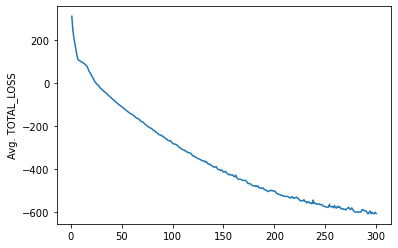

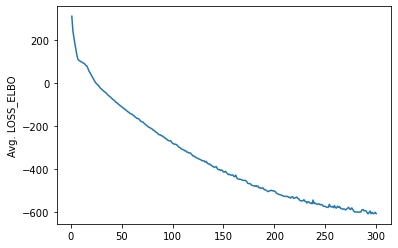

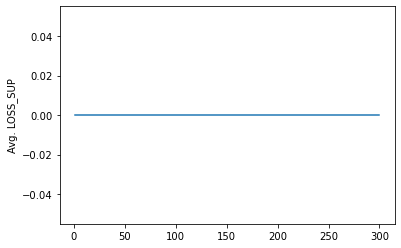

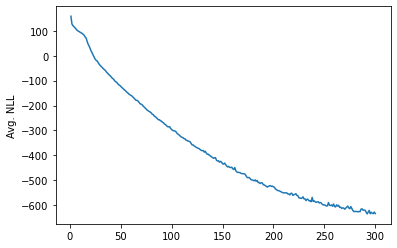

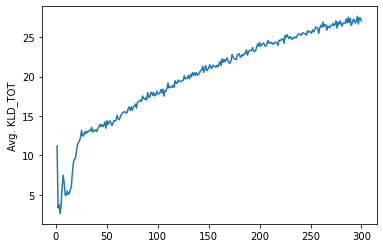

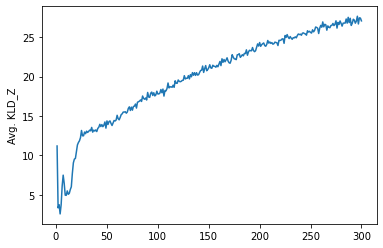

In [29]:
# Plots for losses
for col_name in df_train_metrics.columns:
    if "Avg. " in col_name:
        sns.lineplot(x=epochs_range,y=df_train_metrics[col_name])
        plt.show()

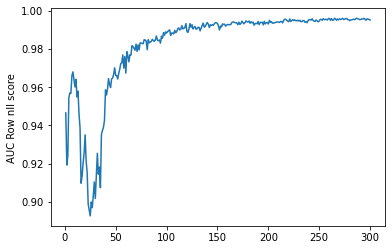

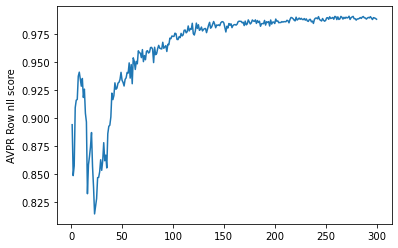

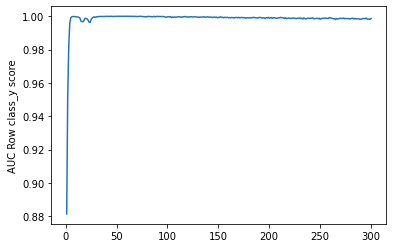

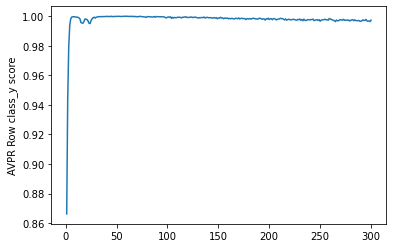

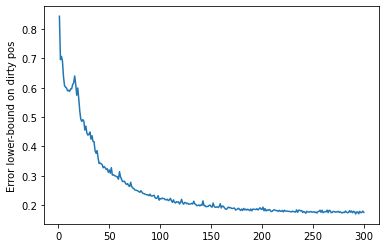

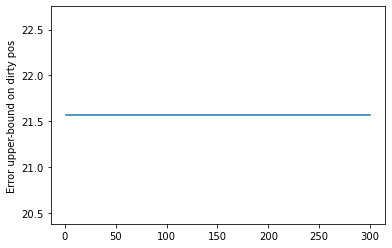

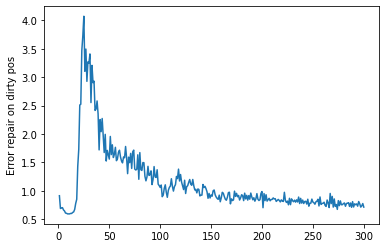

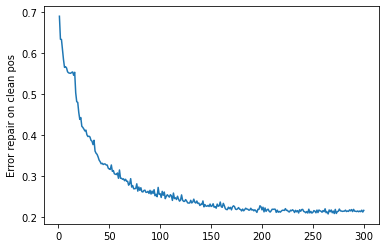

In [30]:
# Plots for classification and repair metrics
list_plot_custom = ["AUC Row nll score", "AVPR Row nll score", 
                    "AUC Row class_y score", "AVPR Row class_y score",
                    "Error lower-bound on dirty pos", "Error upper-bound on dirty pos",
                    "Error repair on dirty pos", "Error repair on clean pos"]

for col_name in list_plot_custom:
    sns.lineplot(x=epochs_range,y=df_train_metrics[col_name])
    plt.show()

## Plots Validation -- Losses

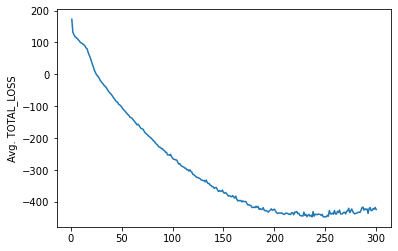

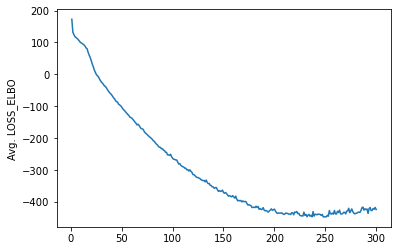

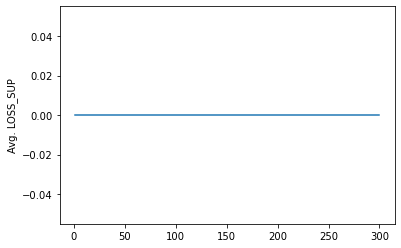

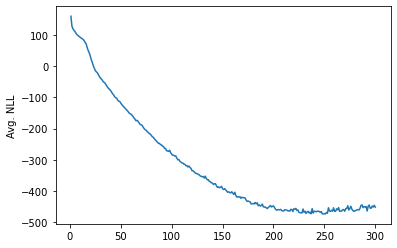

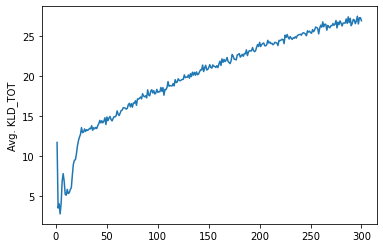

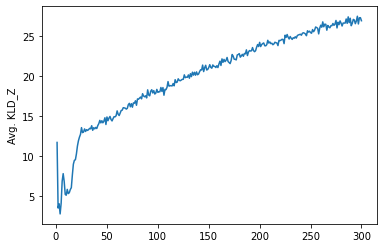

In [31]:
# Plots for losses
for col_name in df_valid_metrics.columns:
    if "Avg. " in col_name:
        sns.lineplot(x=epochs_range,y=df_valid_metrics[col_name])
        plt.show()

### Plot Test -- Losses

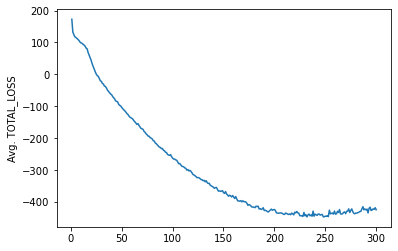

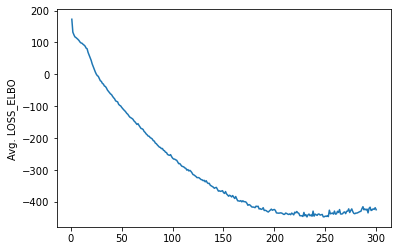

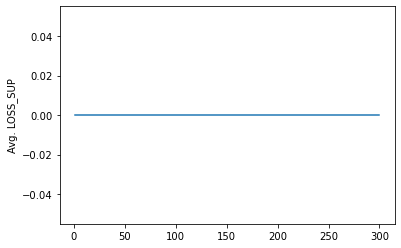

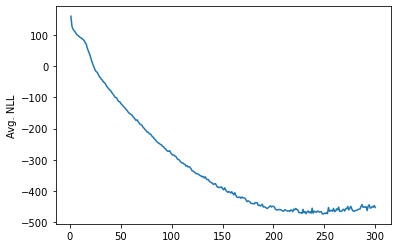

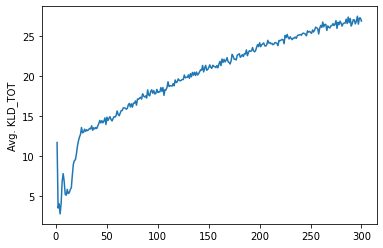

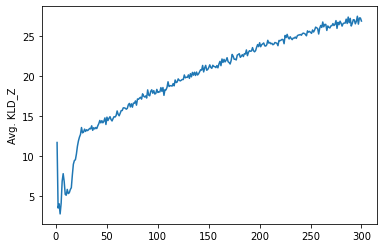

In [32]:
# Plots for losses
for col_name in df_test_metrics.columns:
    if "Avg. " in col_name:
        sns.lineplot(x=epochs_range,y=df_test_metrics[col_name])
        plt.show()

### Get Recons, Latent Space, etc

In [33]:
vae_p_params_xd, vae_q_params, vae_q_samples, _ = vae_mdl(X_train)
recons_train = vae_p_params_xd['recon']['x'].cpu().detach().numpy()
z_train_clean = vae_q_params['z']['mu'].detach().cpu().numpy() # is z_y1 (clean)
z_train_dirty = vae_q_params['z_y0']['mu'].detach().cpu().numpy() # is z_y0 (dirty)


In [34]:
# Plot mu's and covariance's

z_train_y1_mu = vae_q_params['z']['mu'].detach().cpu().numpy() # is z_y1 (clean)
z_train_y0_mu = vae_q_params['z_y0']['mu'].detach().cpu().numpy() # is z_y0 (dirty)

z_train_y1_var = np.exp(vae_q_params['z']['logvar'].detach().cpu().numpy()) # is z_y1 (clean)
z_train_y0_var = np.exp(vae_q_params['z_y0']['logvar'].detach().cpu().numpy()) # is z_y0 (dirty)

print("median of variances (per dim), clean: \n {} \n".format(np.median(z_train_y1_var, axis=0)))
print("median of variances (per dim), dirty: \n {} \n".format(np.median(z_train_y0_var, axis=0)))

print("median of means (per dim), clean: \n {} \n".format(np.median(z_train_y1_mu, axis=0)))
print("median of means (per dim), dirty: \n {} \n".format(np.median(z_train_y0_mu, axis=0)))

median of variances (per dim), clean: 
 [5.6803689e+00 8.8197422e-01 5.8035590e-03 9.8198795e-01 5.4544443e-03
 2.3405883e-03 9.0218306e-01 9.1050190e-01 9.4794011e-01 3.4864168e-03
 1.1711719e-03 9.1603750e-01 9.0652585e-01 1.1566725e-03 1.1002626e-03
 9.6402168e-01] 

median of variances (per dim), dirty: 
 [0.00968069 0.8819742  0.00580356 0.98198795 0.00545444 0.00234059
 0.90218306 0.9105019  0.9479401  0.00348642 0.00117117 0.9160375
 0.90652585 0.00115667 0.00110026 0.9640217 ] 

median of means (per dim), clean: 
 [ 2.2420492   0.01432395  0.16363356 -0.01005817  0.22108927  0.23831171
  0.01594596  0.01546904  0.00504436  0.20311718  0.31164664 -0.01526335
 -0.02971265  0.0984972  -0.15931824  0.00276838] 

median of means (per dim), dirty: 
 [ 0.3374423   0.01432395  0.16363356 -0.01005817  0.22108927  0.23831171
  0.01594596  0.01546904  0.00504436  0.20311718  0.31164664 -0.01526335
 -0.02971265  0.0984972  -0.15931824  0.00276838] 



## Recons

In [35]:
recon_imgs_train = recons_train.reshape(-1,28,20)*dataset_obj.cont_stds + dataset_obj.cont_means

### Show Clean Datapoints at Random

y_noise: 0


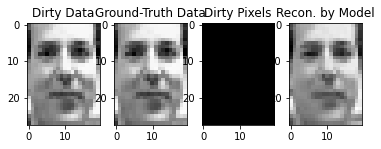

y_noise: 0


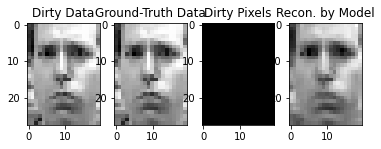

y_noise: 0


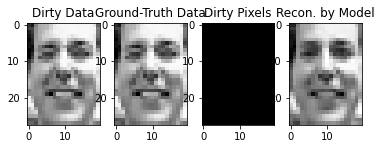

y_noise: 0


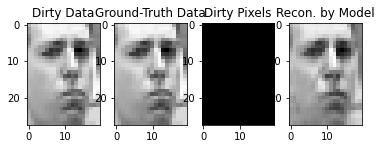

y_noise: 0


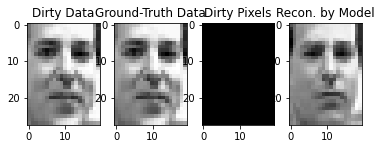

y_noise: 0


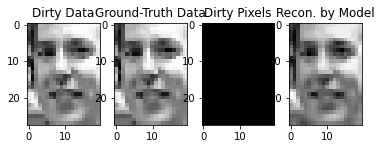

y_noise: 0


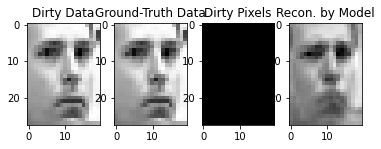

y_noise: 0


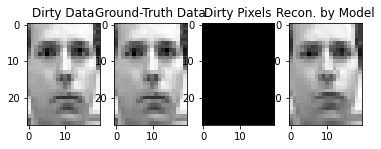

y_noise: 0


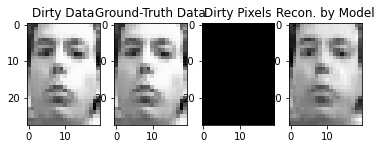

y_noise: 0


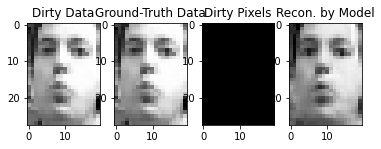

y_noise: 0


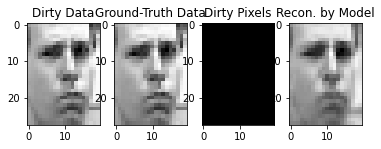

y_noise: 0


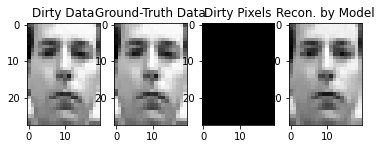

y_noise: 0


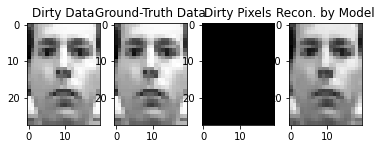

y_noise: 0


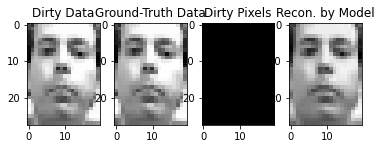

y_noise: 0


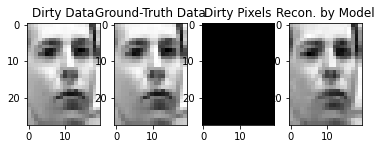

y_noise: 0


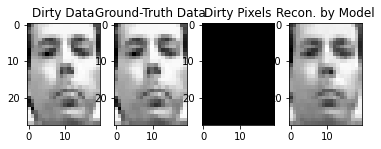

y_noise: 0


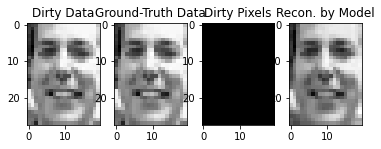

y_noise: 0


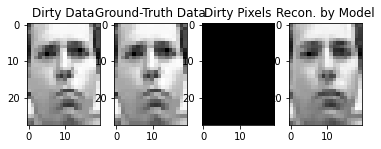

y_noise: 0


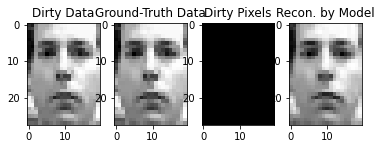

y_noise: 0


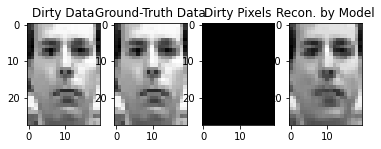

y_noise: 0


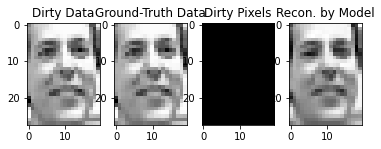

y_noise: 0


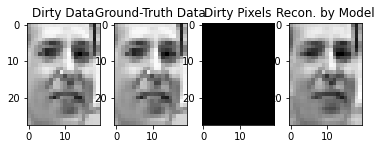

y_noise: 0


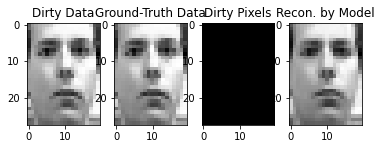

y_noise: 0


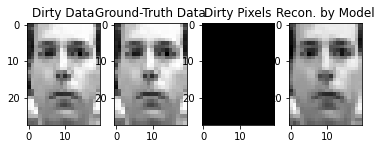

y_noise: 0


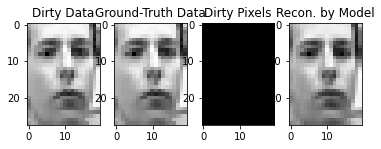

In [36]:
max_imgs_show = 25
y_noise_idxs_train = np.where(~y_noise_instance_train)[0]
some_idxs = np.random.permutation(y_noise_idxs_train)[:max_imgs_show]
# y_noise -- 1 if instance dirty; 0 if instance clean. (NOTE: inverted meaning in generative model)
    
for idx in some_idxs:
    print("y_noise: {}".format(int(y_noise_instance_train[idx])))
    fig, ax = plt.subplots(1,4)
    ax[0].imshow(x_train_orig[idx,...], cmap="gray", ) # vmin=0.0, vmax=1.0
    ax[0].set_title("Dirty Data")
    ax[1].imshow(x_train_clean_orig[idx,...], cmap="gray", ) # vmin=0.0, vmax=1.0
    ax[1].set_title("Ground-Truth Data")
    ax[2].imshow(y_noise_pixels_train[idx,...], cmap="gray", ) # vmin=0.0, vmax=1.0
    ax[2].set_title("Dirty Pixels")
    #ax[3].imshow(recon_imgs_train[idx,...], cmap="gray",) #  vmin=0.0, vmax=1.0
    ax[3].imshow(recon_imgs_train[idx,...], cmap="gray",) #  vmin=0.0, vmax=1.0
    ax[3].set_title("Recon. by Model")
    plt.show()



### Show Dirty Datapoints at Random

y_noise: 1


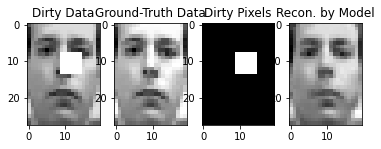

y_noise: 1


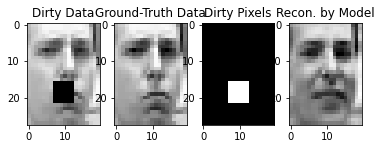

y_noise: 1


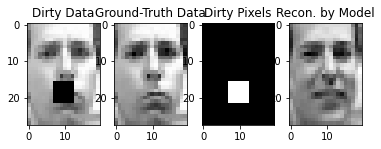

y_noise: 1


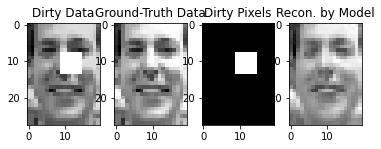

y_noise: 1


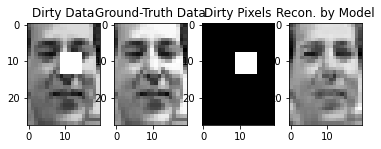

y_noise: 1


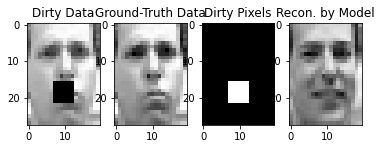

y_noise: 1


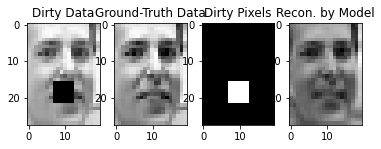

y_noise: 1


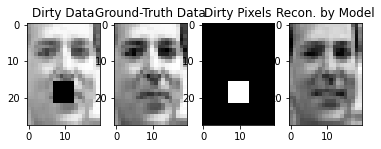

y_noise: 1


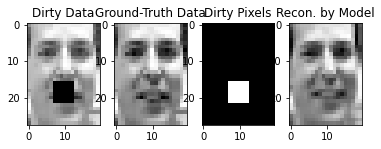

y_noise: 1


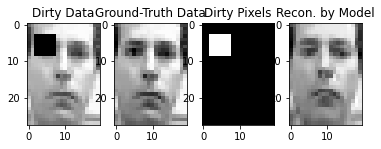

y_noise: 1


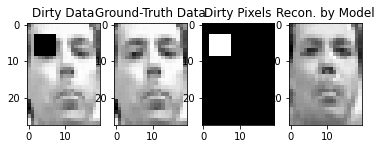

y_noise: 1


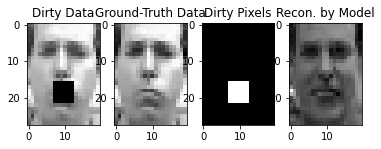

y_noise: 1


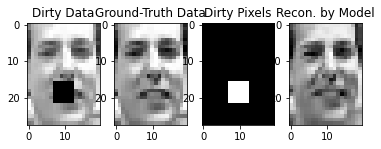

y_noise: 1


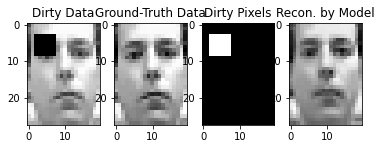

y_noise: 1


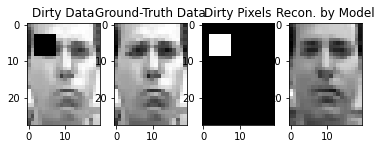

y_noise: 1


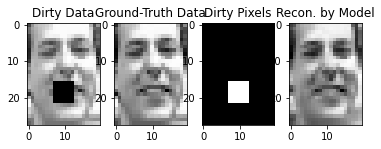

y_noise: 1


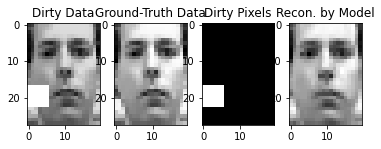

y_noise: 1


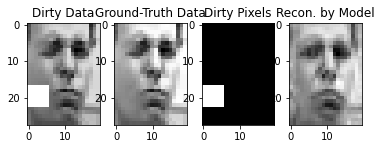

y_noise: 1


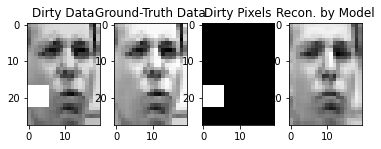

y_noise: 1


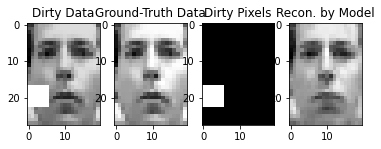

y_noise: 1


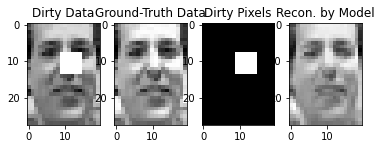

y_noise: 1


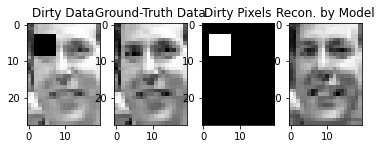

y_noise: 1


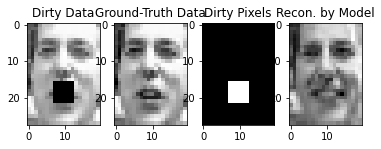

y_noise: 1


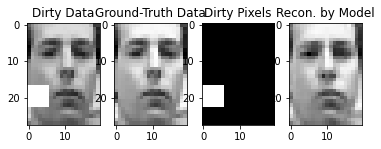

y_noise: 1


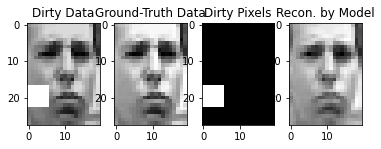

In [37]:
max_imgs_show = 25
y_noise_idxs_train = np.where(y_noise_instance_train)[0]
some_idxs = np.random.permutation(y_noise_idxs_train)[:max_imgs_show]
# y_noise -- 1 if instance dirty; 0 if instance clean. (NOTE: inverted meaning in generative model)
    
for idx in some_idxs:
    print("y_noise: {}".format(int(y_noise_instance_train[idx])))
    fig, ax = plt.subplots(1,4)
    ax[0].imshow(x_train_orig[idx,...], cmap="gray", ) # vmin=0.0, vmax=1.0
    ax[0].set_title("Dirty Data")
    ax[1].imshow(x_train_clean_orig[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[1].set_title("Ground-Truth Data")
    ax[2].imshow(y_noise_pixels_train[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[2].set_title("Dirty Pixels")
    ax[3].imshow(recon_imgs_train[idx,...], cmap="gray",) #  vmin=0.0, vmax=1.0
    #ax[3].imshow(recon_imgs_train[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[3].set_title("Recon. by Model")
    plt.show()



### Show Trusted Set (Clean Ground-Truth, Train Data, Recon)

In [38]:
len(trusted_idxs_train)

50

y_noise: 0


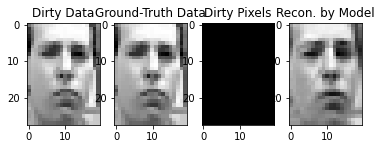

y_noise: 0


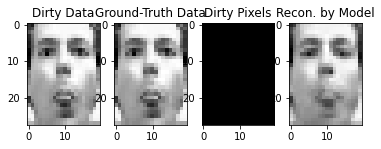

y_noise: 0


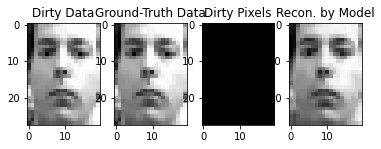

y_noise: 0


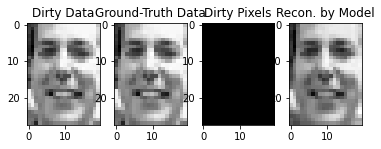

y_noise: 0


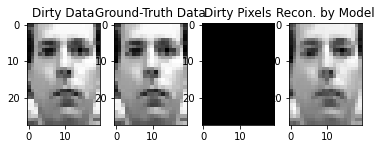

y_noise: 0


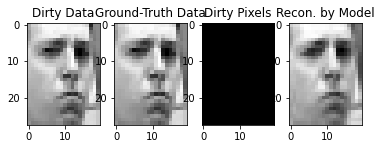

y_noise: 0


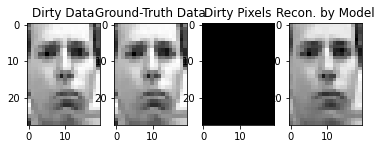

y_noise: 0


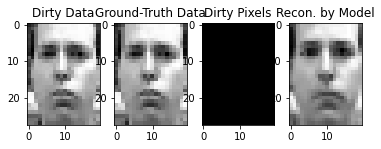

y_noise: 0


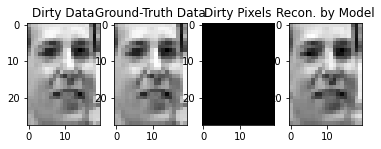

y_noise: 0


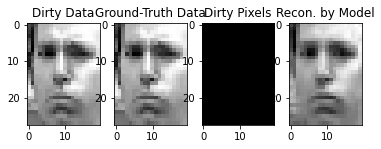

y_noise: 1


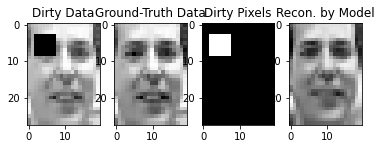

y_noise: 1


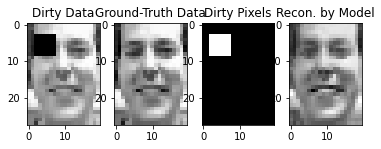

y_noise: 1


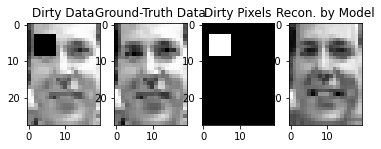

y_noise: 1


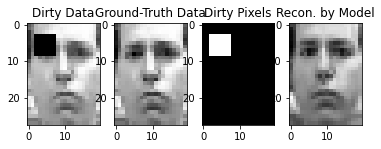

y_noise: 1


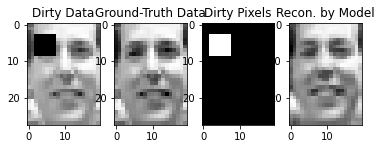

y_noise: 1


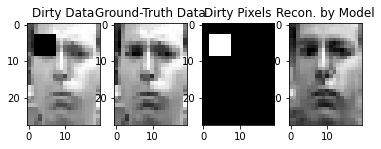

y_noise: 1


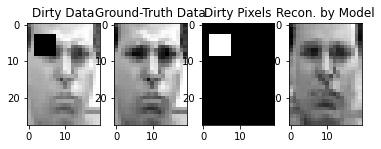

y_noise: 1


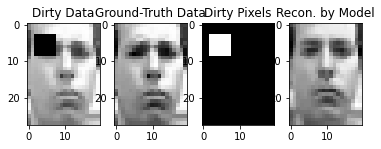

y_noise: 1


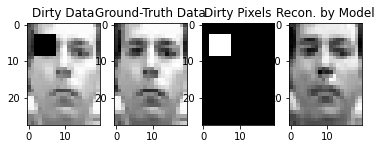

y_noise: 1


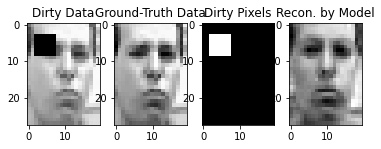

y_noise: 1


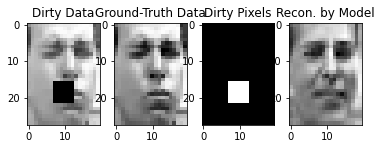

y_noise: 1


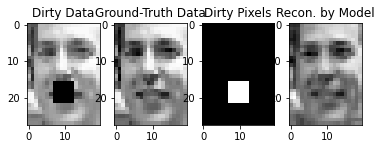

y_noise: 1


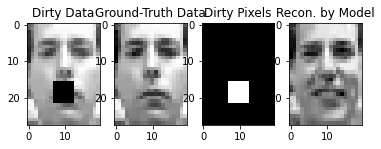

y_noise: 1


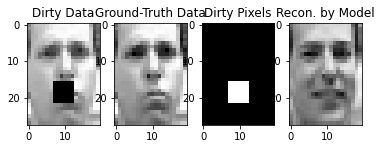

y_noise: 1


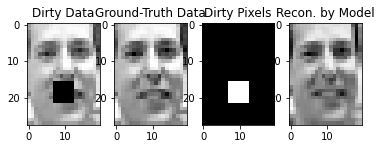

y_noise: 1


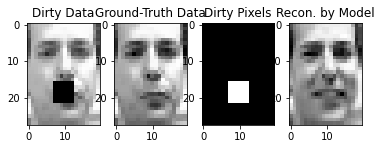

y_noise: 1


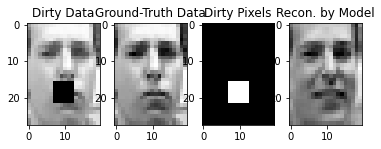

y_noise: 1


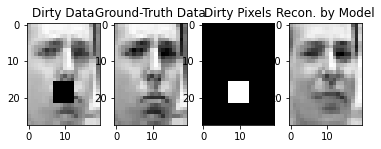

y_noise: 1


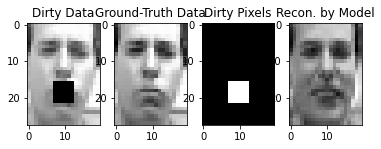

y_noise: 1


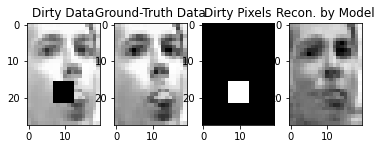

y_noise: 1


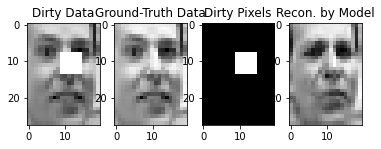

y_noise: 1


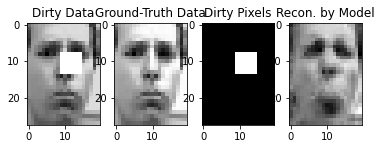

y_noise: 1


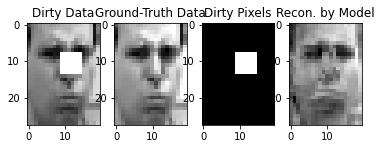

y_noise: 1


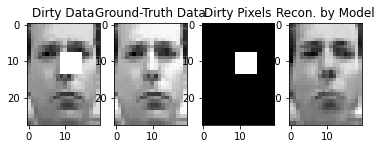

y_noise: 1


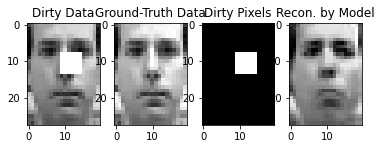

y_noise: 1


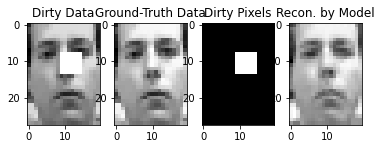

y_noise: 1


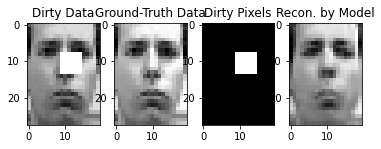

y_noise: 1


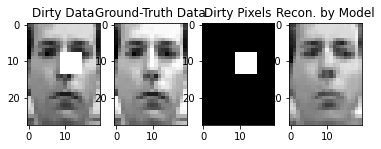

y_noise: 1


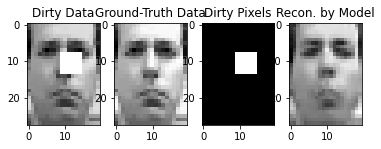

y_noise: 1


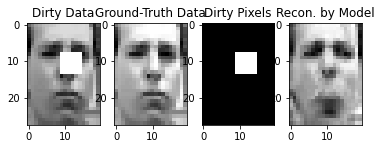

y_noise: 1


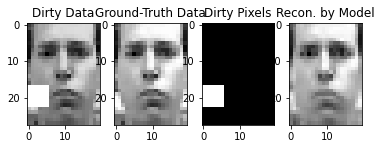

y_noise: 1


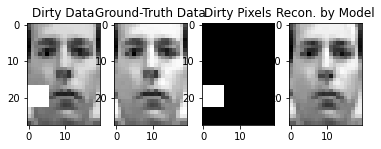

y_noise: 1


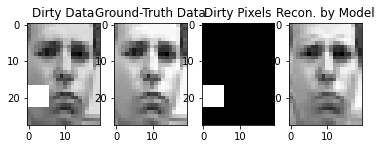

y_noise: 1


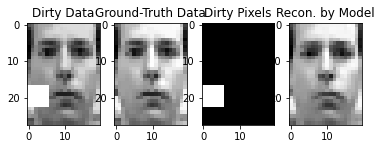

y_noise: 1


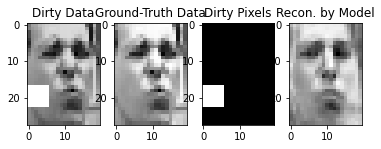

y_noise: 1


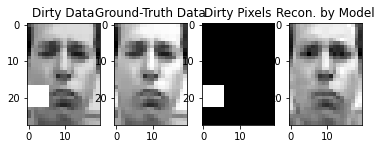

y_noise: 1


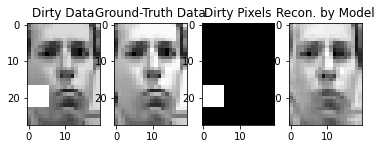

y_noise: 1


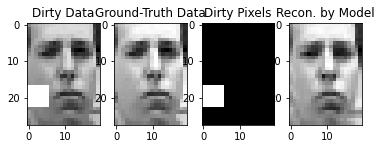

y_noise: 1


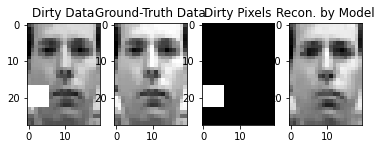

y_noise: 1


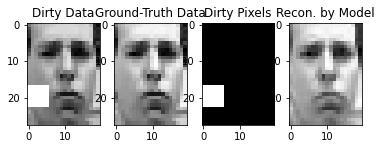

In [39]:
for idx in trusted_idxs_train:
    print("y_noise: {}".format(int(y_noise_instance_train[idx])))
    fig, ax = plt.subplots(1,4)
    ax[0].imshow(x_train_orig[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[0].set_title("Dirty Data")
    ax[1].imshow(x_train_clean_orig[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[1].set_title("Ground-Truth Data")
    ax[2].imshow(y_noise_pixels_train[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[2].set_title("Dirty Pixels")
    ax[3].imshow(recon_imgs_train[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[3].imshow(recon_imgs_train[idx,...], cmap="gray")
    ax[3].set_title("Recon. by Model")
    plt.show()


### Show Latent Space

In [40]:
noised_rows = y_noise_instance_train
noised_rows_str = ["Inlier" if not row_val else "Outlier" for row_val in noised_rows]

#### PCA

In [41]:
from sklearn.decomposition import PCA

all_z_train = np.concatenate([z_train_clean,z_train_dirty], axis=0)
pca_2d_z = PCA(n_components=2) # PCA
pca_2d_z.fit(all_z_train)

PCA(n_components=2)

In [42]:
pca_2d_z.explained_variance_

array([9.678182 , 2.3343709], dtype=float32)

In [43]:
z_train_pca2d_clean = pca_2d_z.transform(z_train_clean)
z_train_pca2d_dirty = pca_2d_z.transform(z_train_dirty)

Text(0.5, 1.0, 'Latent Space Z (Projection to 2D): for q(z|x,y=1)')

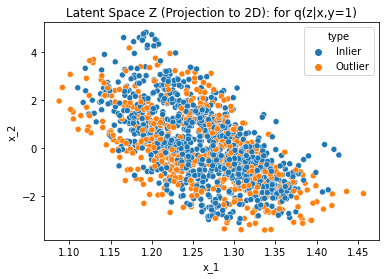

In [44]:
df_plot_z_pca2d_y1 = pd.DataFrame({"x_1": z_train_pca2d_clean[:,0], 
                                   "x_2": z_train_pca2d_clean[:,1], 
                                   "type": noised_rows_str})
sns.scatterplot(x="x_1",y="x_2",hue="type",data=df_plot_z_pca2d_y1)
plt.title("Latent Space Z (Projection to 2D): for q(z|x,y=1)")

Text(0.5, 1.0, 'Latent Space Z (Projection to 2D): for q(z|x,y=0)')

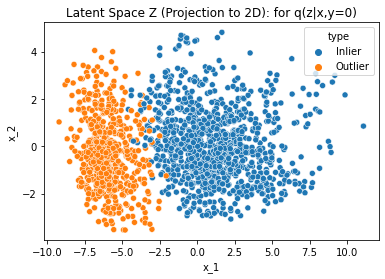

In [45]:
df_plot_z_pca2d_y0 = pd.DataFrame({"x_1": z_train_pca2d_dirty[:,0], 
                                   "x_2": z_train_pca2d_dirty[:,1], 
                                   "type": noised_rows_str})
sns.scatterplot(x="x_1",y="x_2",hue="type",data=df_plot_z_pca2d_y0)
plt.title("Latent Space Z (Projection to 2D): for q(z|x,y=0)")

### Kernel PCA

In [46]:
from sklearn.decomposition import KernelPCA

kpca_2d_z = KernelPCA(n_components=2, kernel='rbf', degree=5)
kpca_2d_z.fit(all_z_train)

KernelPCA(degree=5, kernel='rbf', n_components=2)

In [47]:
z_train_kpca2d_clean = kpca_2d_z.transform(z_train_clean)
z_train_kpca2d_dirty = kpca_2d_z.transform(z_train_dirty)

Text(0.5, 1.0, 'Latent Space Z (Projection to 2D): for q(z|x,y=1)')

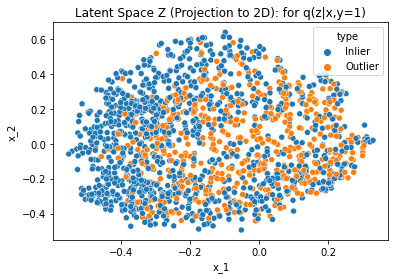

In [48]:
df_plot_z_kpca2d_y1 = pd.DataFrame({"x_1": z_train_kpca2d_clean[:,0], 
                                   "x_2": z_train_kpca2d_clean[:,1], 
                                   "type": noised_rows_str})
sns.scatterplot(x="x_1",y="x_2",hue="type",data=df_plot_z_kpca2d_y1)
plt.title("Latent Space Z (Projection to 2D): for q(z|x,y=1)")

Text(0.5, 1.0, 'Latent Space Z (Projection to 2D): for q(z|x,y=0)')

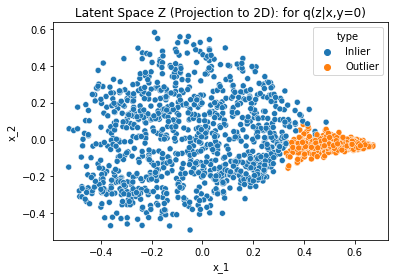

In [49]:
df_plot_z_kpca2d_y0 = pd.DataFrame({"x_1": z_train_kpca2d_dirty[:,0], 
                                    "x_2": z_train_kpca2d_dirty[:,1], 
                                    "type": noised_rows_str})
sns.scatterplot(x="x_1",y="x_2",hue="type",data=df_plot_z_kpca2d_y0)
plt.title("Latent Space Z (Projection to 2D): for q(z|x,y=0)")

#### T-SNE

In [50]:
from sklearn.manifold import TSNE

In [51]:
tsne_2d_z = TSNE(n_components=2, perplexity=180.0, n_iter=5000)
_z_all_2d = tsne_2d_z.fit_transform(all_z_train)

In [52]:
_len_dataset = z_train_pca2d_clean.shape[0]

z_train_tsne2d_clean = _z_all_2d[:_len_dataset]
z_train_tsne2d_dirty = _z_all_2d[_len_dataset:]

Text(0.5, 1.0, 'Latent Space Z (Projection to 2D): for q(z|x,y=1)')

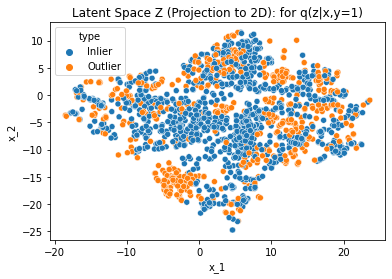

In [53]:
df_plot_z_tsne2d_y1 = pd.DataFrame({"x_1": z_train_tsne2d_clean[:,0], 
                                   "x_2": z_train_tsne2d_clean[:,1], 
                                   "type": noised_rows_str})
sns.scatterplot(x="x_1",y="x_2",hue="type",data=df_plot_z_tsne2d_y1)
plt.title("Latent Space Z (Projection to 2D): for q(z|x,y=1)")

Text(0.5, 1.0, 'Latent Space Z (Projection to 2D): for q(z|x,y=0)')

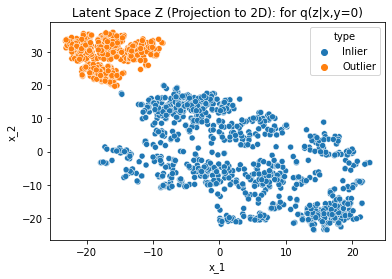

In [54]:
df_plot_z_tsne2d_y0 = pd.DataFrame({"x_1": z_train_tsne2d_dirty[:,0], 
                                   "x_2": z_train_tsne2d_dirty[:,1], 
                                   "type": noised_rows_str})
sns.scatterplot(x="x_1",y="x_2",hue="type",data=df_plot_z_tsne2d_y0)
plt.title("Latent Space Z (Projection to 2D): for q(z|x,y=0)")

### Approx. Log-Likelihood

In [55]:
from repair_syserr_models.loss_utils import log_px_approx_eval

In [56]:
# TODO: insert option for cuda vs. cpu !!
x_inputs = X_train.cuda()
vae_mdl.cuda();


In [57]:
with torch.autograd.profiler.profile(use_cuda=True, profile_memory=True) as prof:

    # log p(x|y) evaluation, for both y=1 and y=0
    elbo_iwae_map = log_px_approx_eval(vae_mdl,
                                       dataset_obj,
                                       x_inputs,
                                       k_samples=250,
                                       y_comps=True,
                                       batch_size=128)

    # to clear GPU Mem -- if used.
    log_px_est_y1 = elbo_iwae_map["y1"].clone().cpu()
    log_px_est_y0 = elbo_iwae_map["y0"].clone().cpu()
    
    del elbo_iwae_map["y1"]
    del elbo_iwae_map["y0"]
    del elbo_iwae_map
    torch.cuda.empty_cache()


Compute Progress: 100%|█████████████████████████████████████████████| 13/13 [00:00<00:00, 44.45it/s]


In [58]:
# print(prof)

In [59]:
arrs_elbo_iwae = np.concatenate([log_px_est_y1,log_px_est_y0,y_noise_instance_train.reshape(-1,1)], axis=1)

df_elbo_iwae = pd.DataFrame(arrs_elbo_iwae, columns=["log_px_y1", "log_px_y0", "noise_label"])
df_elbo_iwae["noise_label"] = df_elbo_iwae["noise_label"].apply(lambda x: "dirty" if x==1 else "clean")

In [60]:
df_elbo_iwae

log_px_y1   log_px_y0 noise_label
0     501.227051  498.026245       clean
1     596.022339  595.372437       clean
2     783.497925  789.048096       dirty
3     748.770508  752.755798       dirty
4     490.837830  491.981415       clean
...          ...         ...         ...
1567  778.343140  777.810059       clean
1568  657.829834  654.684814       clean
1569  506.083435  507.850250       dirty
1570  722.174683  721.613159       clean
1571  457.615143  463.272308       dirty

[1572 rows x 3 columns]

In [61]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)
    

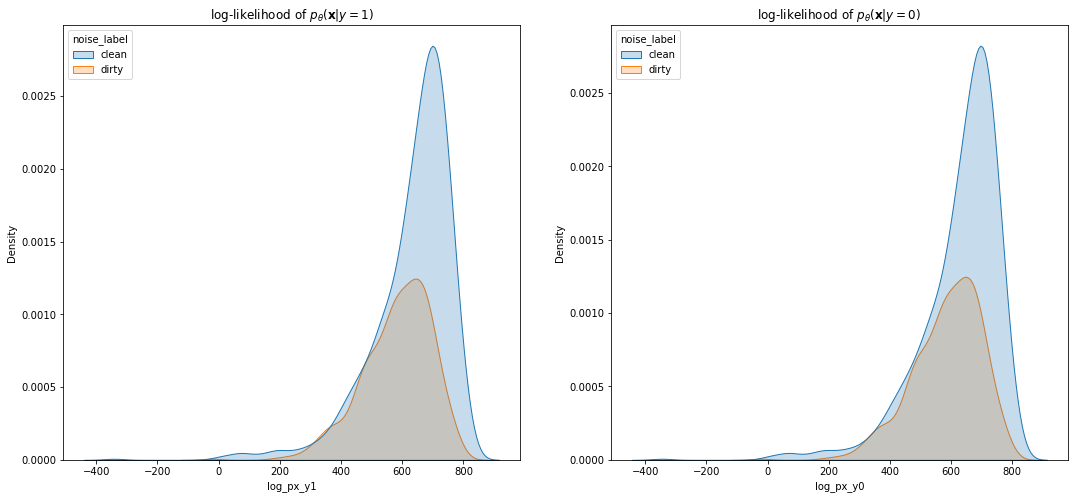

In [62]:
fig, axes = plt.subplots(1,2, figsize=(18,8))

sns.kdeplot(ax=axes[0], data=df_elbo_iwae, x="log_px_y1", hue="noise_label", fill=True, legend=True)
#_ax = axes[0].twinx()
#sns.histplot(ax=_ax, data=df_elbo_iwae, x="log_px_y1", hue="noise_label", legend=False, fill=False, stat="density")

axes[0].set_title("log-likelihood of $p_{\\theta}(\mathbf{x}|y=1)$")
move_legend(axes[0], "upper left")


sns.kdeplot(ax=axes[1], data=df_elbo_iwae, x="log_px_y0", hue="noise_label", fill=True, legend=True)
#_ax = axes[1].twinx()
#sns.histplot(ax=_ax, data=df_elbo_iwae, x="log_px_y0", hue="noise_label", legend=False, fill=False, stat="density")

axes[1].set_title("log-likelihood of $p_{\\theta}(\mathbf{x}|y=0)$")
move_legend(axes[1], "upper left")


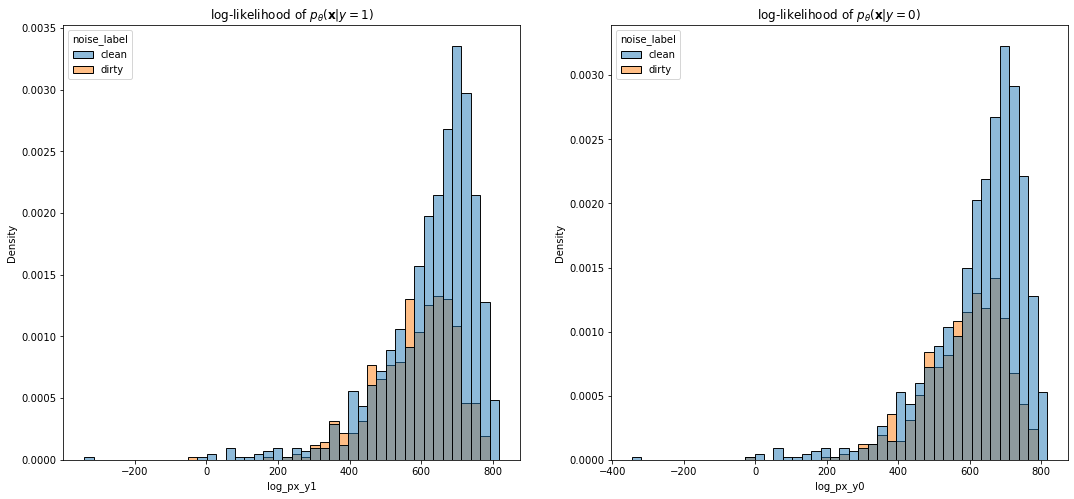

In [63]:
fig, axes = plt.subplots(1,2, figsize=(18,8))

sns.histplot(ax=axes[0], data=df_elbo_iwae, x="log_px_y1", hue="noise_label", legend=True, stat="density")
axes[0].set_title("log-likelihood of $p_{\\theta}(\mathbf{x}|y=1)$")
move_legend(axes[0], "upper left")

sns.histplot(ax=axes[1], data=df_elbo_iwae, x="log_px_y0", hue="noise_label", legend=True, stat="density")
axes[1].set_title("log-likelihood of $p_{\\theta}(\mathbf{x}|y=0)$")
move_legend(axes[1], "upper left")


In [64]:
def epdf(xs, bins):
    xmin, xmax = np.inf, -np.inf
    for xi in xs:
        xmin = min(xmin, np.nanmin(xi))
        xmax = max(xmax, np.nanmax(xi))
    bin_range = (xmin, xmax)
    bins = np.lib.histograms.histogram_bin_edges(np.concatenate(xs), bins, bin_range)
    tops = []
    for xi in xs:
        m, _ = np.histogram(xi, bins, density=True)
        tops.append(m.astype(float))
    return tops, bins



In [65]:
tops, bin_edges = epdf([log_px_est_y1.numpy().flatten()[~y_noise_instance_train], log_px_est_y1.numpy().flatten()[y_noise_instance_train]], 25)
top_model, top_data = tops[0], tops[1]

In [66]:
np.sum(np.abs(top_model - top_data))

0.0110930135691701

In [67]:
def histogram_intersection(h1, h2, bins):
    bins = np.diff(bins)
    sm = 0
    for i in range(len(bins)):
        sm += min(bins[i]*h1[i], bins[i]*h2[i])
    return sm

In [68]:
histogram_intersection(tops[0], tops[1], bin_edges)

0.7428178649520469